<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-defs" data-toc-modified-id="Imports-and-defs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and defs</a></span></li><li><span><a href="#Run-algorithms" data-toc-modified-id="Run-algorithms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run algorithms</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot</a></span></li></ul></div>

# Imports and defs

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import sys
stdout = sys.stdout
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os, sys
import datetime
import pickle 
from collections import defaultdict
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

data_fig_path = 'results/'
sys.path.append('./' )
sys.path.append('../')
import utils.utils_syn as utils_syn

os.makedirs(data_fig_path, exist_ok=True)
class exp_result():
    '''dummy class to act as struct'''
    pass

# Run algorithms

In [52]:
n = 10  # number of players
Dtmp = 8   # hidden dims
# Please only choose data_id = 1
data_id = 1
# 1: flid, F(V) = 0
data_name= (
        'dicut-uniform',           # 0
        'FLID-0F(V)',     # 1
        )

plot_opt = ('--db', '--v', '-.^',  # 0, 1, 2
'-.*k', '-.hg',                     # 3 4
 ':Dk', '-h',                      # 5 6
'--c', '--',                       # 7 8
'-' , '--sm', ':sr',                # 9 10 11
'-.<r', '--dr'                      # 12, 13
)

color_opt = {}
color_opt[1] = 'orange'
color_opt[2] = 'green'
color_opt[6] = 'black'
color_opt[8] = 'cyan'

# used for legend
solver_names = (
      'DR-DoubleGreedy',        # 0
      'Shapley',                 # 1
      'Banzhaf',                # 2    Banzhaf(0.5)
      'Banzhaf(0.25)',           # 3 
      'DG-MeanField',           # 4 
      'NaiveMeanField-0.5' ,               # 5  0 init.
      'Variational',                      # 6
      'GroundTruth-FLID',                      # 7
      'True Marginals',                        # 8
      )

In [53]:
nm_names = len(solver_names)

solver_list = [1, 2,  6,  8]
traj_solver_list = [4, 5, 8]
    
num_epoch = 10*n
print(f"num_epoch: {num_epoch}")
print(f"solver_list:  {solver_list}")
print(f"traj_solver_list: traj_solver_list")
nm_solver = len(solver_list)
nm_exps = 1


#% used for traj. plotting
exp_id=0; param_id = 0

subfix = str(datetime.date.today()) + '-n-'+ str(n) +\
    '-dataid-' + str(data_id)
print('subfix:', subfix)
results = defaultdict(exp_result) 

num_epoch: 100
solver_list:  [1, 2, 6, 8]
traj_solver_list: traj_solver_list
subfix: 2022-03-31-n-10-dataid-1


In [54]:
#    load data 
[f, grad, gradi, param] = utils_syn.load_data(data_id, Dtmp, n, data_fig_path)

print('data: %s, n: %d, D: %d \n'\
   % ( data_name[data_id], param.n, Dtmp) );

data: FLID-0F(V), n: 10, D: 8 



In [55]:
idx_exp = 0
i = 0
for solver_id in solver_list:
    [opt_x, opt_f, fs, margs, runtime] =\
     utils_syn.launch_solver(f, grad, gradi, \
        param, solver_id, num_epoch)

    results[idx_exp, i, solver_id].opt_f = opt_f;  # optimal function value
    results[idx_exp, i, solver_id].fs = fs;
    results[idx_exp, i, solver_id].opt_x  = opt_x;
    results[idx_exp, i, solver_id].margs  = margs;
    results[idx_exp, i, solver_id].runtime = runtime;
    results[idx_exp, i, solver_id].name = solver_names[solver_id]

# Plot

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
sns.set_style('white')

/root/anaconda3/envs/game/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


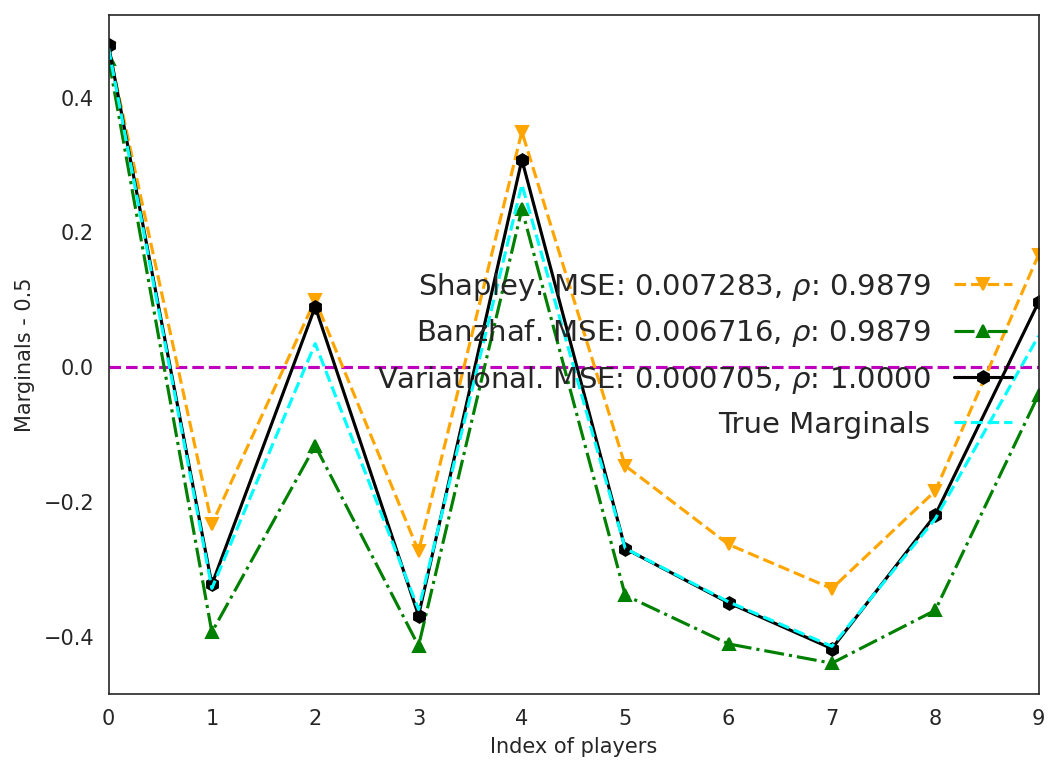

In [57]:
plt.figure(figsize=[8, 6], dpi=150)
groundtruth_id = 8
tt = datetime.datetime.now().strftime("%Y-%d-%m-%H-%M-%S")

x = range(n)
for i in solver_list:
    if i == groundtruth_id:
        plt.plot(x, results[0,0,i].margs - 0.5, plot_opt[i], color=color_opt[i], label=results[0,0,i].name)
    else:
        plt.plot(x, results[0,0,i].margs - 0.5, plot_opt[i], color=color_opt[i], label=results[0,0,i].name + 
                 r'. MSE: {0:.6f}, $\rho$: {1:.4f}'.format(mean_squared_error(results[0,0,groundtruth_id].margs, results[0,0,i].margs), spearmanr(results[0,0,groundtruth_id].margs, results[0,0,i].margs)[0]))
    
plt.legend(markerfirst=False, frameon=False,  loc='best', prop={"size":14})
plt.xlabel('Index of players')
plt.ylabel('Marginals - 0.5')
# plt.title('(Marginals - 0.5) returned by different methods')
# plt.grid(True)
plt.hlines(0, 0, n-1, colors='m', linestyles='dashed')
plt.axis([0, n-1, None, None])
plt.xticks(list(range(n)))
# plt.axis('tight' 
plt.savefig(data_fig_path + "/" + data_name[data_id] + f"-n-{n}-D-{Dtmp}-{tt}.pdf", format='pdf', transparent=True,
           frameon=True)
plt.show()